# Importing and Cleaning

In [1]:
# Data can be found at https://www.kaggle.com/kemical/kickstarter-projects/version/7#ks-projects-201801.csv
# Let's load the data in first before anything

import os
import pandas as pd
import numpy as np
os.chdir("/Users/jtsw/Desktop/kickstarter_proj")
data = pd.read_csv("ks.csv")

In [2]:
# Now that we have imported the data, we can do some eyeball checks to get a better idea of what we are dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [3]:
def col_information(col):
    
    length = len(data)
    unique_length = len(np.unique(data[col].astype(str)))
    unique_entries = np.unique(data[col].astype(str))
    data_type = data[col].dtypes
    null_indicator = data[col].isnull().sum()
    
    print('The length of the %s column is %s.' % (col, length))
    print('The %s column has %s unique entries.' % (col, unique_length))
    print('The data type for the %s column is %s.' % (col, data_type))
    print('The %s column has %s null values.' % (col, null_indicator))
    print('Do you want to see the unique entries?')
    
    while True:
        
        reply = input()
        positive = ['Yes', 'yes', 'YES']
        negative = ['No', 'no', 'NO']
    
        if reply in positive:
            print(unique_entries)
            break
        elif reply in negative:
            break
        else:
            print('Please enter a valid reply')
    

In [4]:
data.describe()
# So far all the percentiles look quite reasonable

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
# Lets check the columns individually just to make sure before diving into analysis
# ID column

#col_information('ID')
# We can see the ID values are in a interger format
# Every project seems to have a unique ID 
# Nothing much more to say

In [6]:
# Next let's check the name column

#col_information('name')
# There seems to be some repeats in the name column
# There is also 4 null values which does not really make sense in the case of project names

In [7]:
# Let's try to see which are the repeat entries to find out more
data[data.duplicated('name', keep = False)].sort_values('name', axis = 0, ascending = True)
# There are 2896 duplicated entries
# Total of 5125 duplicates including originals
# This means that there are 5125 - 2896 = 2229 names that are being duplicated
# It also means that there are more than 2 duplicates for some of these 2229 names
# Note that dates are in a YYYY - MM - DD format
# Seems that duplicated names are mostly not errors. But are instead restarts and cancellation of projects
# There are a few weird project names (not sure if they are intended to be like that) but as of now we can leave them
# 4 NaN values for project names also but may not be important

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.0,2017-04-14 00:08:52,1.0,failed,1,US,25.00,1.00,100000.00
352573,866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.0,2015-01-27 19:30:43,7248.0,canceled,9,US,7248.00,7248.00,20000.00
149726,1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.0,2014-07-29 13:12:21,11260.0,canceled,7,US,11260.00,11260.00,15000.00
196363,1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.0,2016-05-07 01:56:36,0.0,canceled,0,"N,0""",NaN,0.00,5000.00
353421,870322805,"""Color"" Music Video",Music,Music,USD,2015-09-16,1100.0,2015-09-02 00:03:02,1100.0,undefined,0,"N,0""",NaN,1100.00,1100.00


In [8]:
#col_information('category')
# Nothing much, looks quite reasonable

In [9]:
#col_information('main_category')
# Nothing much. Seems reasonable

In [10]:
#col_information('currency')
# AUD - australian, CAD - Canadian, CHF - Swiss Franc, DKK - Danish Krone, Eur - Euros, GPB - Great britian pound, HKD - HK dollar
# JPY - Yen, MXN - Mexican dollar, NOK - Norweigen Krone, NZD - Kiwi, SEK - Swedish Krone, SGD - Singapore, USD - United States

In [11]:
#col_information('deadline')
# Date is mix of numbers and strings, may want to convert it to Datetime or String format for easier manipulation
# We know that it has 3164 unique entries so instead of checking all 378661, we can just check the unique entries for consistency

In [12]:
sum([len(date) for date in list(np.unique(data['deadline']).astype('str'))])
[len(date) for date in list(np.unique(data['deadline']).astype('str')) if len(date) != 10]

# This is quite a creative way to check that the date formats are all equal.
# Since 3164 unique entries, each date is 10 characters long after being converted into a string
# As long as the total length is 3160 * 10, it shows that most probably the same length
# Or to be safer, you can do the more conditional list comprehension with a condition

[]

In [13]:
#col_information('goal')
# Nothing much, just refer to describe for min and max

In [14]:
#col_information('launched')
# Seems that this has the date and time in a mixed format. May want to convert to string also for easier manipulation.
# Is the time really important?
# Check if the format is all the same again

[len(datetime) for datetime in list(np.unique(data['launched']).astype('str')) if len(datetime) != 19]

[]

In [15]:
#col_information('pledged')
# Nothing much, refer to describe for min and max to make sure no negatives

In [16]:
#col_information('state')
# cancelled - project is cancelled by the creators
# failed - project failed to reach the target by the deadline
# live - project is currently still in the midst of sourcing
# successful - project has reached its goal and is fulfilling its requirements 
# suspended - https://www.kickstarter.com/help/search?utf8=%E2%9C%93&term=suspended (non-reversible)
# undefined  - no clue

In [17]:
#col_information('backers')
# Nothing much, integer is a good sign. Just check min and max from describe

In [18]:
#col_information('country')
# AT - austria, AU - australia, BE - belgium, CA - canada, CH - china, DE - germany, DK - denmark, ES - spain, FR - france, GB - great britain
# HK - hongkong, IE - ireland, IT - italy, JP - japan, LU -luxemborg, MX - mexico, NL - netherlands, NO - norway, NZ - newzeland, SE - sweden
# SG - singapore, US - united states
# What is N,0 ? Mistake?

In [19]:
data[data['country'] == 'N,0"']
# There are 3797 rows with this weird country. The entries do not seem like mistakes though
# Significant number of datapoints so will keep it for now. Maybe change the country name to something else easier to type

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [20]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [21]:
#col_information('usd pledged')
# Assume no difference between nan and 0?
# Same for last 3 columns

In [22]:
# Now let's actually clean the data and tweak it to what we want
# Since name is not important, we can just leave the 4 NaN and weird values

# Next we can convert all the dates into string formats 
# We can also consider ignoring the time segment
data[['deadline', 'launched']] = data[['deadline', 'launched']].astype(str)

In [23]:
data['time_launched'] = data['launched'].apply(lambda x: x[-8:])
data['year_launched'] = data['launched'].apply(lambda x: x[:10])
data['country'] = data['country'].replace('N,0"', 'Undefined')

## Exploratory Data Analysis

In [50]:
import matplotlib.pyplot as plt; plt.rcdefaults()

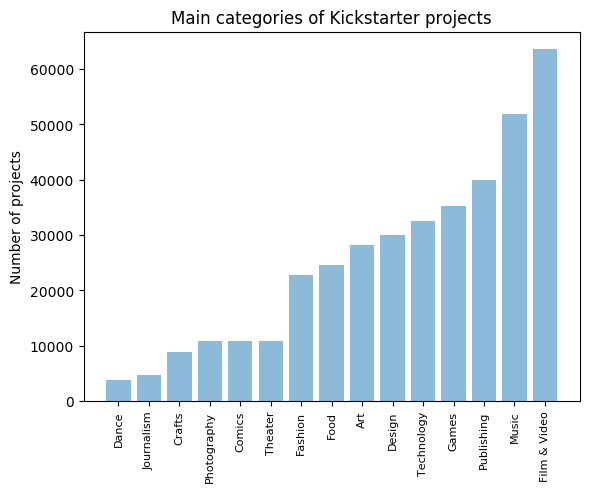

In [25]:
# Note that we threw away duplicated names here to avoid having any biasness from people who restart their project often

plt.clf()
main_cat_sort = data[data['name'].duplicated(keep = 'first')]
main_cat_sort = data.groupby('main_category').count()['ID'].reset_index().sort_values(by = 'ID')
objects = main_cat_sort['main_category']
y_pos = np.arange(len(objects))
performance = main_cat_sort['ID']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 90, fontsize = 8)
plt.ylabel('Number of projects')
plt.title('Main categories of Kickstarter projects')
 
plt.show()
# Right off the bat we can see that film and video projects are the most popular projects for creators

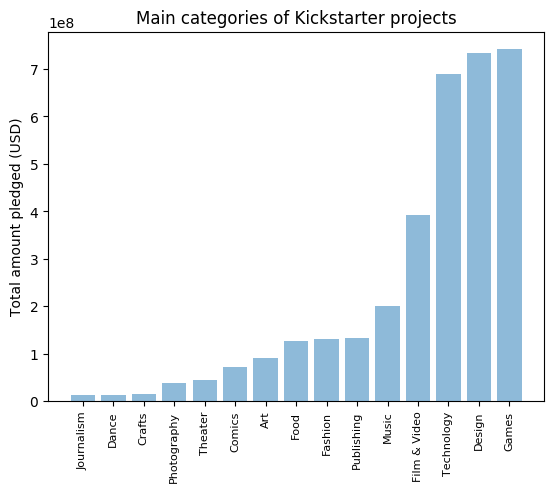

In [26]:
# We know that there film and video are the most popular in raw project numbers but what about in terms of pledged amounts?
# This time we will not remove the duplicated entries as re-runs are also counted in pledged amounts
# Remember to use the usd_pledged real column to standardise the data
plt.clf()
main_cat_sort = data.groupby('main_category').sum()['usd_pledged_real'].reset_index().sort_values(by = 'usd_pledged_real')
objects = main_cat_sort['main_category']
y_pos = np.arange(len(objects))
performance = main_cat_sort['usd_pledged_real']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 90, fontsize = 8)
plt.ylabel('Total amount pledged (USD)')
plt.title('Main categories of Kickstarter projects')
 
plt.show()
# Surprisingly, we see that design, games and technology projects takes the top three positions in terms of total amounts pledged.
# Why is this?
# Just by going through these results, we can conclude that backers in these categories are pledging more on averge
# But just how much more are they pledging?

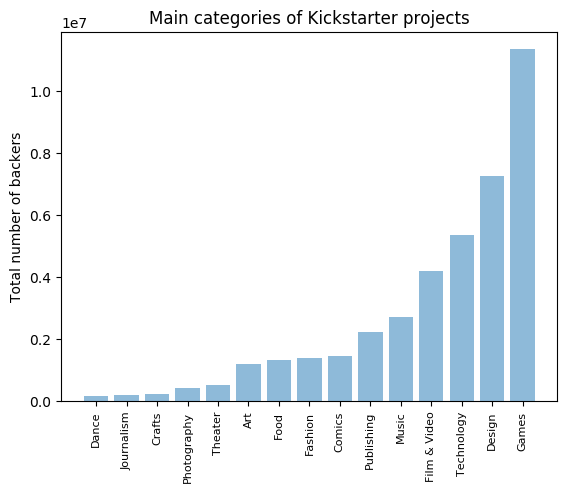

In [27]:
plt.clf()
main_cat_sort = data.groupby('main_category').sum()['backers'].reset_index().sort_values(by = 'backers')
objects = main_cat_sort['main_category']
y_pos = np.arange(len(objects))
performance = main_cat_sort['backers']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 90, fontsize = 8)
plt.ylabel('Total number of backers')
plt.title('Main categories of Kickstarter projects')
 
plt.show()
# Seems that these categories are just popular amongst consumers

In [28]:
# Games
games_data = data[data['main_category'] == "Games"]

In [29]:
np.unique(games_data['category'])
# We can see that games are further broken down into different types
# But let's look at games as a whole first

array(['Games', 'Gaming Hardware', 'Live Games', 'Mobile Games',
       'Playing Cards', 'Puzzles', 'Tabletop Games', 'Video Games'], dtype=object)

In [30]:
# We can try to get some information on backers' behavior for games?
total_backers_games = games_data['backers'].sum()
total_plg_games = games_data['usd_pledged_real'].sum()
backers_avg_plg = total_plg_games / total_backers_games

In [31]:
backers_avg_plg
# Can see that backers for this category have a average pledge of $65
# What other measures can we get besides the mean?

# Let's create a function to get some overall statistics for each main category?

65.39106213386461

In [32]:
def main_category_info(mc):
    
    if mc in np.unique(data['main_category']):
        data_temp = data[data['main_category'] == mc]
        no_of_projs = round((data_temp.groupby('category')['ID'].count() / data_temp['ID'].count()) * 100)
        no_of_backers = round((data_temp.groupby('category')['backers'].sum() / data_temp['backers'].sum()) * 100)
        avg_goal = np.round(data_temp.groupby('category')['usd_goal_real'].mean())
        total_pledged = np.round(data_temp.groupby('category')['usd_pledged_real'].sum() / data_temp['usd_pledged_real'].sum() * 100)
        avg_plg_per_backer = np.round(data_temp.groupby('category')['usd_pledged_real'].sum() / data_temp.groupby('category')['backers'].sum())
        avg_backer_per_proj = np.round(data_temp.groupby('category')['backers'].sum() / data_temp.groupby('category')['ID'].count())
        
        states = data_temp.groupby(['category', 'state'])['state'].count().unstack().fillna(0)
        states_total = states.sum(axis = 1)
        canc_perc = np.round((states['canceled'] / states_total) * 100, 2)
        failed_perc = np.round((states['failed'] / states_total) * 100, 2)
        live_perc = np.round((states['live'] / states_total) * 100, 2)
        succ_perc = np.round((states['successful'] / states_total) * 100, 2)
        #und_perc = np.round((states['undefined'] / states_total) * 100, 2)
    
        #summary = pd.DataFrame({'% of projects' : no_of_projs, '% of backers': no_of_backers, 'Avg project goal(USD)' : avg_goal, 'Total % pledged' : total_pledged, 'Avg backer/project' : avg_backer_per_proj, 'Avg pledged/ backer' : avg_plg_per_backer, '% cancelled' : canc_perc, '% failed' : failed_perc, '% live' : live_perc, '% successful' : succ_perc, '% undefined' : und_perc } )
        summary = pd.concat([canc_perc, failed_perc, live_perc, succ_perc, no_of_projs, total_pledged, no_of_backers, avg_goal, avg_plg_per_backer, avg_backer_per_proj], axis = 1)
        summary.columns = [['% cancelled', '% failed', '% live', '% succeded', '% projs', '% backers', 'Total pledged %', 'Avg proj goal', 'Avg pledged/backer', 'Avg backer/proj']]
        return summary
    else:
        print('Please enter a valid main category into the function!')
        

In [33]:
games_summary = main_category_info('Games')

In [34]:
# Now we can see a simple summary of the sub categories within each main one
# We can see that surprisingly, the highest average pledged comes from the gaming and hardware category
# Table top and video games are the most popular ones
# Surprisingly Gaming hardware has alot of backers per project but there are lesser projects in that category

In [35]:
games_summary

,% cancelled,% failed,% live,% succeded,% projs,% backers,Total pledged %,Avg proj goal,Avg pledged/backer,Avg backer/proj
category,,,,,,,,,,
Games,16.68,57.47,0.68,24.15,9.0,3.0,2.0,52439.0,79.0,83.0
Gaming Hardware,22.20,44.86,0.93,23.13,1.0,2.0,1.0,77286.0,141.0,284.0
Live Games,13.24,66.00,0.57,17.14,3.0,0.0,0.0,172522.0,95.0,23.0
Mobile Games,17.27,72.11,1.17,8.55,5.0,0.0,0.0,29807.0,68.0,21.0
Playing Cards,17.54,41.73,1.48,38.73,7.0,2.0,3.0,10732.0,43.0,156.0
Puzzles,11.26,48.48,1.30,38.10,1.0,0.0,0.0,12833.0,53.0,116.0
Tabletop Games,16.18,27.35,0.76,55.47,40.0,63.0,53.0,14695.0,77.0,427.0
Video Games,19.97,58.68,0.73,20.17,34.0,29.0,39.0,76741.0,49.0,374.0


In [36]:
# Biggest contribution is from tabletop games, with highest number of proj, number of backers and amount pledged
# Can tell that it consists of many small projects with a low average goal of 14,695
# Also it attracts many small investors instead of few large ones
# Success rate also relatively high compared to other categories at 55.5%

In [44]:
# Does a lower goal mean higher chance of success?
games_data['year_launched'] = games_data['year_launched'].astype(str).apply(lambda x: x[:4])

/Users/jtsw/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


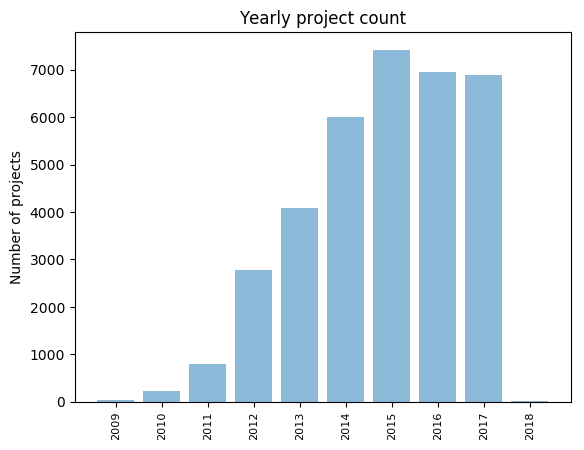

In [49]:
plt.clf()
main_cat_sort = games_data.groupby('year_launched')['ID'].count().reset_index()
objects = main_cat_sort['year_launched']
y_pos = np.arange(len(objects))
performance = main_cat_sort['ID']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 90, fontsize = 8)
plt.ylabel('Number of projects')
plt.title('Yearly project count')
 
plt.show()
# Can see the non-linear growth of projects till te year 2015 then a slight dip the past 2 years
# Ignore 2018 since data is probably incomplete at this point in time